Aplicamos lo aprendido en las actividades en las que hicimos uso del dataset de DESI.
Es decir, lo que haremos es:

·  Aplicar GridSearchCV para encontrar los mejores hiperparámetros de la red convolucional que elaboré como tarea y que clasifica espectros astronómicos (GALAXY, STAR, QSO).

Clasificacion espectral.

Formas finales:
X: (492, 7781)
Y: (492,)
Shape de entrenamiento: (344, 7781, 1)

BÚSQUEDA 1: Epochs y Batch Size
Fitting 2 folds for each of 6 candidates, totalling 12 fits


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=16, epochs=3; total time=  16.6s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=16, epochs=3; total time=  12.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=16, epochs=5; total time=  24.2s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=16, epochs=5; total time=  23.1s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=32, epochs=3; total time=  15.2s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=32, epochs=3; total time=  15.0s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=32, epochs=5; total time=  25.7s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=32, epochs=5; total time=  22.1s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=64, epochs=3; total time=  14.8s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=64, epochs=3; total time=  14.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=64, epochs=5; total time=  24.7s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ............................batch_size=64, epochs=5; total time=  21.2s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Resultados Búsqueda 1 ---
0.7791 (+/-0.0000) con: {'batch_size': 16, 'epochs': 3}
0.8314 (+/-0.0000) con: {'batch_size': 16, 'epochs': 5}
0.7355 (+/-0.0203) con: {'batch_size': 32, 'epochs': 3}
0.7820 (+/-0.0029) con: {'batch_size': 32, 'epochs': 5}
0.7384 (+/-0.0233) con: {'batch_size': 64, 'epochs': 3}
0.7587 (+/-0.0029) con: {'batch_size': 64, 'epochs': 5}

✓ Mejor score: 0.8314
✓ Mejores params: {'batch_size': 16, 'epochs': 5}

BÚSQUEDA 2: Filtros CNN y Neuronas Dense
Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=16, model__filters_2=32; total time=  14.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=16, model__filters_2=32; total time=  12.8s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=16, model__filters_2=32; total time=  14.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=16, model__filters_2=64; total time=  17.5s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=16, model__filters_2=64; total time=  23.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=16, model__filters_2=64; total time=  16.9s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=16, model__filters_2=128; total time=  45.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=16, model__filters_2=128; total time=  39.1s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=16, model__filters_2=128; total time= 1.1min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=32, model__filters_2=32; total time=  26.2s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=32, model__filters_2=32; total time=  16.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=32, model__filters_2=32; total time=  14.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=32, model__filters_2=64; total time=  22.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=32, model__filters_2=64; total time=  22.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=32, model__filters_2=64; total time=  34.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=32, model__filters_2=128; total time= 1.0min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=32, model__filters_2=128; total time=  54.6s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=32, model__filters_2=128; total time=  48.6s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=64, model__filters_2=32; total time=  29.9s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=64, model__filters_2=32; total time=  24.8s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=64, model__filters_2=32; total time=  29.9s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=64, model__filters_2=64; total time=  36.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=64, model__filters_2=64; total time=  51.0s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=64, model__filters_2=64; total time=  35.5s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=64, model__filters_2=128; total time= 1.3min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=64, model__filters_2=128; total time= 1.1min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=32, model__filters_1=64, model__filters_2=128; total time= 1.5min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=16, model__filters_2=32; total time=  11.1s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=16, model__filters_2=32; total time=  17.1s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=16, model__filters_2=32; total time=  10.7s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=16, model__filters_2=64; total time=  17.5s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=16, model__filters_2=64; total time=  19.8s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=16, model__filters_2=64; total time=  28.7s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=16, model__filters_2=128; total time=  39.7s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=16, model__filters_2=128; total time=  42.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=16, model__filters_2=128; total time=  41.0s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=32, model__filters_2=32; total time=  17.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=32, model__filters_2=32; total time=  17.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=32, model__filters_2=32; total time=  19.7s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=32, model__filters_2=64; total time=  23.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=32, model__filters_2=64; total time=  31.8s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=32, model__filters_2=64; total time=  25.9s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=32, model__filters_2=128; total time= 1.3min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=32, model__filters_2=128; total time= 1.3min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=32, model__filters_2=128; total time=  55.2s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=64, model__filters_2=32; total time=  20.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=64, model__filters_2=32; total time=  20.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=64, model__filters_2=32; total time=  20.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=64, model__filters_2=64; total time=  51.9s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=64, model__filters_2=64; total time=  58.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=64, model__filters_2=64; total time=  48.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=64, model__filters_2=128; total time= 1.9min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=64, model__filters_2=128; total time= 1.5min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=64, model__filters_1=64, model__filters_2=128; total time= 1.2min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=16, model__filters_2=32; total time=  13.8s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=16, model__filters_2=32; total time=  11.2s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=16, model__filters_2=32; total time=  17.5s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=16, model__filters_2=64; total time=  29.5s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=16, model__filters_2=64; total time=  21.9s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=16, model__filters_2=64; total time=  17.9s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=16, model__filters_2=128; total time=  34.0s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=16, model__filters_2=128; total time=  49.6s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=16, model__filters_2=128; total time=  48.8s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=32, model__filters_2=32; total time=  14.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=32, model__filters_2=32; total time=  14.0s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=32, model__filters_2=32; total time=  20.0s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=32, model__filters_2=64; total time=  34.8s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=32, model__filters_2=64; total time=  29.6s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=32, model__filters_2=64; total time=  37.7s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=32, model__filters_2=128; total time=  55.2s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=32, model__filters_2=128; total time=  52.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=32, model__filters_2=128; total time=  54.8s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=64, model__filters_2=32; total time=  27.7s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=64, model__filters_2=32; total time=  25.2s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=64, model__filters_2=32; total time=  26.9s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=64, model__filters_2=64; total time=  33.9s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=64, model__filters_2=64; total time=  31.6s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=64, model__filters_2=64; total time=  31.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=64, model__filters_2=128; total time= 1.3min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=64, model__filters_2=128; total time= 1.2min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__filters_1=64, model__filters_2=128; total time= 1.0min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Resultados Búsqueda 2 ---
0.8198 (+/-0.0216) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 32, 'model__filters_1': 16, 'model__filters_2': 32}
0.8227 (+/-0.0249) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 32, 'model__filters_1': 16, 'model__filters_2': 64}
0.8227 (+/-0.0226) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 32, 'model__filters_1': 16, 'model__filters_2': 128}
0.8256 (+/-0.0254) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 32, 'model__filters_1': 32, 'model__filters_2': 32}
0.8227 (+/-0.0226) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 32, 'model__filters_1': 32, 'model__filters_2': 64}
0.8256 (+/-0.0213) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 32, 'model__filters_1': 32, 'model__filters_2': 128}
0.8227 (+/-0.0249) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 32, 'model__filters_1': 64, 'model__filters_2': 32}
0.8285 (+/-0.0146) con: {'batch_size': 16, 'epochs': 5, '

c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.1, model__filters_1=32, model__filters_2=128; total time=  56.3s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.1, model__filters_1=32, model__filters_2=128; total time=  54.9s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.1, model__filters_1=32, model__filters_2=128; total time=  57.5s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.2, model__filters_1=32, model__filters_2=128; total time=  57.6s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.2, model__filters_1=32, model__filters_2=128; total time=  53.8s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.2, model__filters_1=32, model__filters_2=128; total time=  55.0s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.3, model__filters_1=32, model__filters_2=128; total time=  55.5s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.3, model__filters_1=32, model__filters_2=128; total time=  42.7s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.3, model__filters_1=32, model__filters_2=128; total time=  59.6s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.4, model__filters_1=32, model__filters_2=128; total time= 1.1min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.4, model__filters_1=32, model__filters_2=128; total time=  46.1s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.4, model__filters_1=32, model__filters_2=128; total time= 1.0min


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.5, model__filters_1=32, model__filters_2=128; total time=  55.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.5, model__filters_1=32, model__filters_2=128; total time=  53.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=5, model__dense_units=128, model__dropout_rate=0.5, model__filters_1=32, model__filters_2=128; total time=  45.4s


c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Resultados Búsqueda 3 ---
0.8285 (+/-0.0216) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 128, 'model__dropout_rate': 0.1, 'model__filters_1': 32, 'model__filters_2': 128}
0.8285 (+/-0.0146) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 128, 'model__dropout_rate': 0.2, 'model__filters_1': 32, 'model__filters_2': 128}
0.8256 (+/-0.0186) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 128, 'model__dropout_rate': 0.3, 'model__filters_1': 32, 'model__filters_2': 128}
0.8227 (+/-0.0178) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 128, 'model__dropout_rate': 0.4, 'model__filters_1': 32, 'model__filters_2': 128}
0.8285 (+/-0.0216) con: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 128, 'model__dropout_rate': 0.5, 'model__filters_1': 32, 'model__filters_2': 128}

✓ Mejor score: 0.8285
✓ Mejores params: {'batch_size': 16, 'epochs': 5, 'model__dense_units': 128, 'model__dropout_rate': 0.1, 'model__filters_1': 32, 'model__filters_2

c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_333 (Conv1D)             │ (None, 7777, 32)       │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_222               │ (None, 3888, 32)       │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_334 (Conv1D)             │ (None, 3884, 128)      │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_223               │ (None, 1942, 128)      │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_335 (Conv1D)             │ (None, 1940, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_111    │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_222 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,979 (339.76 KB)

 Trainable params: 86,979 (339.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 979ms/step - accuracy: 0.7442 - loss: 0.8905 - val_accuracy: 0.7568 - val_loss: 0.7185
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 968ms/step - accuracy: 0.7907 - loss: 0.6303 - val_accuracy: 0.8243 - val_loss: 0.5814
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 903ms/step - accuracy: 0.8198 - loss: 0.5472 - val_accuracy: 0.8243 - val_loss: 0.5632
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 836ms/step - accuracy: 0.8169 - loss: 0.5458 - val_accuracy: 0.8243 - val_loss: 0.5430
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8227 - loss: 0.5322 - val_accuracy: 0.8243 - val_loss: 0.5412

EVALUACIÓN FINAL
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - accuracy: 0.8243 - loss: 0.5412

Precisión en Test: 0.8243
Loss en Test: 0.5412
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step

--- Classification Report ---
              precision    recall  f1-score   support

      GALAXY       0.83      0.99      0.90       102
        STAR       0.81      0.91      0.86  

c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\op354\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

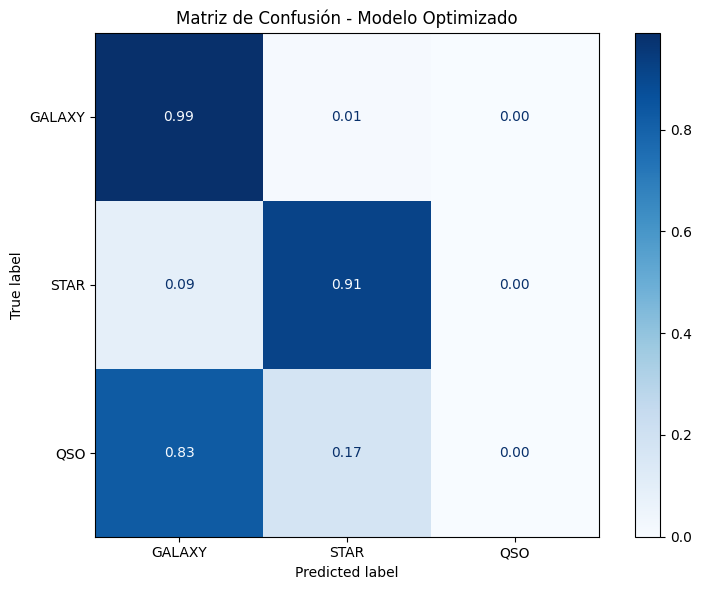

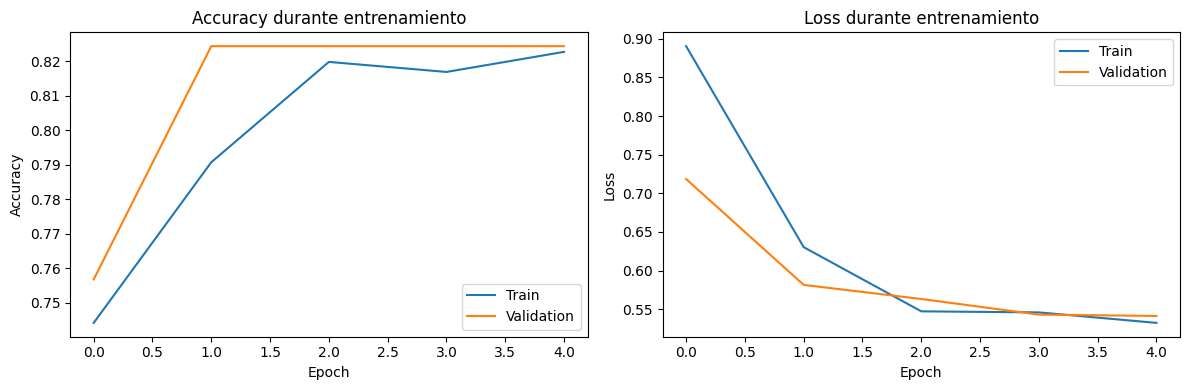

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras import models, layers

# Cargamos los datos
df_spectra = pd.read_csv(r'C:\Users\op354\OneDrive\Documentos\Oscar\UG\Repositorio Github\ejerciosytareas-Oscarraul28\balanced_spectra_features.csv')

# Cargamos el archivo de espectros
datos = np.load(r'C:\Users\op354\OneDrive\Documentos\Oscar\UG\Repositorio Github\ejerciosytareas-Oscarraul28\balanced_spectra_flux.npz', allow_pickle=True)
targetids = datos['targetids']
f_arrays = datos['flux_arrays']

# Preparamos los datos
X = []
Y = []

for i in range(len(targetids)):
    spectype_reng = df_spectra.loc[df_spectra['targetid'] == targetids[i], 'spectype']
    if spectype_reng.empty:
        continue
    spectype = spectype_reng.values[0]

    if spectype == 'GALAXY':
        Y.append(0)
    elif spectype == 'STAR':
        Y.append(1)
    elif spectype == 'QSO':
        Y.append(2)
    else:
        continue
    X.append(f_arrays[i])

X = np.asarray(X)
Y = np.asarray(Y)

print("Formas finales:")
print("X:", X.shape)
print("Y:", Y.shape)

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=112)

# Escalamiento de datos
escalador = StandardScaler()
X_train_esc = escalador.fit_transform(X_train)
X_test_esc = escalador.transform(X_test)

# Expandimos dimensión para Conv1D
X_train_esc = np.expand_dims(X_train_esc, axis=-1)
X_test_esc = np.expand_dims(X_test_esc, axis=-1)

print("Shape de entrenamiento:", X_train_esc.shape)

# Guardamos la forma de entrada para usarla en las funciones
INPUT_SHAPE = (X_train_esc.shape[1], 1)

# Definimos los modelos para GridSearchCV

def create_model_v1(filters_1=32, filters_2=64, dense_units=64, dropout_rate=0.3):
    """
    Modelo CNN 1D con hiperparámetros configurables.
    """
    modelo = models.Sequential([
        layers.Conv1D(filters_1, kernel_size=5, activation='relu', input_shape=INPUT_SHAPE),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters_2, kernel_size=5, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(128, kernel_size=3, activation='relu'),
        layers.GlobalAveragePooling1D(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(3, activation='softmax')
    ])
    
    modelo.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return modelo

# Búsqueda de hiperparámetros

# Configuramos semilla para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)

# Crear wrapper de Keras para sklearn
model = KerasClassifier(model=create_model_v1, verbose=0)

# -----------------------------------------------------------------------------
# BÚSQUEDA 1: Epochs y Batch Size
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("BÚSQUEDA 1: Epochs y Batch Size")
print("="*60)

param_grid_1 = {
    'epochs': [3, 5],
    'batch_size': [16, 32, 64]
}

grid_1 = GridSearchCV(
    estimator=model, 
    param_grid=param_grid_1, 
    cv=2,  # 3-fold cross validation
    scoring='accuracy',
    n_jobs=1,  # Para Keras es mejor usar 1
    verbose=2
)

grid_result_1 = grid_1.fit(X_train_esc, y_train)

# Resultados
print("\n--- Resultados Búsqueda 1 ---")
means = grid_result_1.cv_results_['mean_test_score']
stds = grid_result_1.cv_results_['std_test_score']
params = grid_result_1.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"{mean:.4f} (+/-{std:.4f}) con: {param}")

print(f"\n✓ Mejor score: {grid_result_1.best_score_:.4f}")
print(f"✓ Mejores params: {grid_result_1.best_params_}")

# Guardamos los mejores valores
best_epochs = grid_result_1.best_params_['epochs']
best_batch = grid_result_1.best_params_['batch_size']

# -----------------------------------------------------------------------------
# Segunda busqueda: arquitectura de la red (filtros y neuronas)

print("\n" + "="*60)
print("BÚSQUEDA 2: Filtros CNN y Neuronas Dense")
print("="*60)

param_grid_2 = {
    'model__filters_1': [16, 32, 64],
    'model__filters_2': [32, 64, 128],
    'model__dense_units': [32, 64, 128],
    'epochs': [best_epochs],  # Usamos el mejor de la búsqueda anterior
    'batch_size': [best_batch]
}

grid_2 = GridSearchCV(
    estimator=model,
    param_grid=param_grid_2,
    cv=3,
    scoring='accuracy',
    n_jobs=1,
    verbose=2
)

grid_result_2 = grid_2.fit(X_train_esc, y_train)

# Resultados
print("\n--- Resultados Búsqueda 2 ---")
means = grid_result_2.cv_results_['mean_test_score']
stds = grid_result_2.cv_results_['std_test_score']
params = grid_result_2.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"{mean:.4f} (+/-{std:.4f}) con: {param}")

print(f"\n✓ Mejor score: {grid_result_2.best_score_:.4f}")
print(f"✓ Mejores params: {grid_result_2.best_params_}")

# Tercera busqueda: Dropout (regularización)

print("\n" + "="*60)
print("BÚSQUEDA 3: Tasa de Dropout")
print("="*60)

best_filters_1 = grid_result_2.best_params_['model__filters_1']
best_filters_2 = grid_result_2.best_params_['model__filters_2']
best_dense = grid_result_2.best_params_['model__dense_units']

param_grid_3 = {
    'model__filters_1': [best_filters_1],
    'model__filters_2': [best_filters_2],
    'model__dense_units': [best_dense],
    'model__dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'epochs': [best_epochs],
    'batch_size': [best_batch]
}

grid_3 = GridSearchCV(
    estimator=model,
    param_grid=param_grid_3,
    cv=3,
    scoring='accuracy',
    n_jobs=1,
    verbose=2
)

grid_result_3 = grid_3.fit(X_train_esc, y_train)

print("\n--- Resultados Búsqueda 3 ---")
means = grid_result_3.cv_results_['mean_test_score']
stds = grid_result_3.cv_results_['std_test_score']
params = grid_result_3.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"{mean:.4f} (+/-{std:.4f}) con: {param}")

print(f"\n✓ Mejor score: {grid_result_3.best_score_:.4f}")
print(f"✓ Mejores params: {grid_result_3.best_params_}")

# Entrenamiento final con los mejores hiperparámetros

print("\n" + "="*60)
print("ENTRENAMIENTO FINAL CON MEJORES HIPERPARÁMETROS")
print("="*60)

# Extraemos los mejores parámetros
best_params = grid_result_3.best_params_
print(f"Configuración óptima encontrada:")
print(f"  - Filters 1: {best_params['model__filters_1']}")
print(f"  - Filters 2: {best_params['model__filters_2']}")
print(f"  - Dense units: {best_params['model__dense_units']}")
print(f"  - Dropout: {best_params['model__dropout_rate']}")
print(f"  - Epochs: {best_params['epochs']}")
print(f"  - Batch size: {best_params['batch_size']}")

# Crear modelo final con los mejores hiperparámetros
modelo_final = create_model_v1(
    filters_1=best_params['model__filters_1'],
    filters_2=best_params['model__filters_2'],
    dense_units=best_params['model__dense_units'],
    dropout_rate=best_params['model__dropout_rate']
)

modelo_final.summary()

# Entrenar modelo final
history = modelo_final.fit(
    X_train_esc, y_train,
    validation_data=(X_test_esc, y_test),
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1
)

# Evaluación del modelo optimizado
print("\n" + "="*60)
print("EVALUACIÓN FINAL")
print("="*60)

loss, acc = modelo_final.evaluate(X_test_esc, y_test)
print(f"\nPrecisión en Test: {acc:.4f}")
print(f"Loss en Test: {loss:.4f}")

# Predicciones
y_pred = np.argmax(modelo_final.predict(X_test_esc), axis=1)

# Reporte de clasificación
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['GALAXY', 'STAR', 'QSO']))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['GALAXY', 'STAR', 'QSO'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='.2f', ax=ax)
plt.title('Matriz de Confusión - Modelo Optimizado')
plt.tight_layout()
plt.show()

# Curvas de entrenamiento
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title('Accuracy durante entrenamiento')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title('Loss durante entrenamiento')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

Notamos que obtenemos predicciones ligeramente mejores que las de la actividad anterior, tal como se muestra en la matriz de confusiones.
Sin embargo, el problema sigue estando en los Quasares, obteniendo el mismo tipo de predicciones nulas en Quasares, mostrando una confusion entre estos y galaxias y estrellas.
Lo que se puede hacer es incrementar el numero de datos de este cuerpo celeste para mejorar la calidad del entrenamiento.